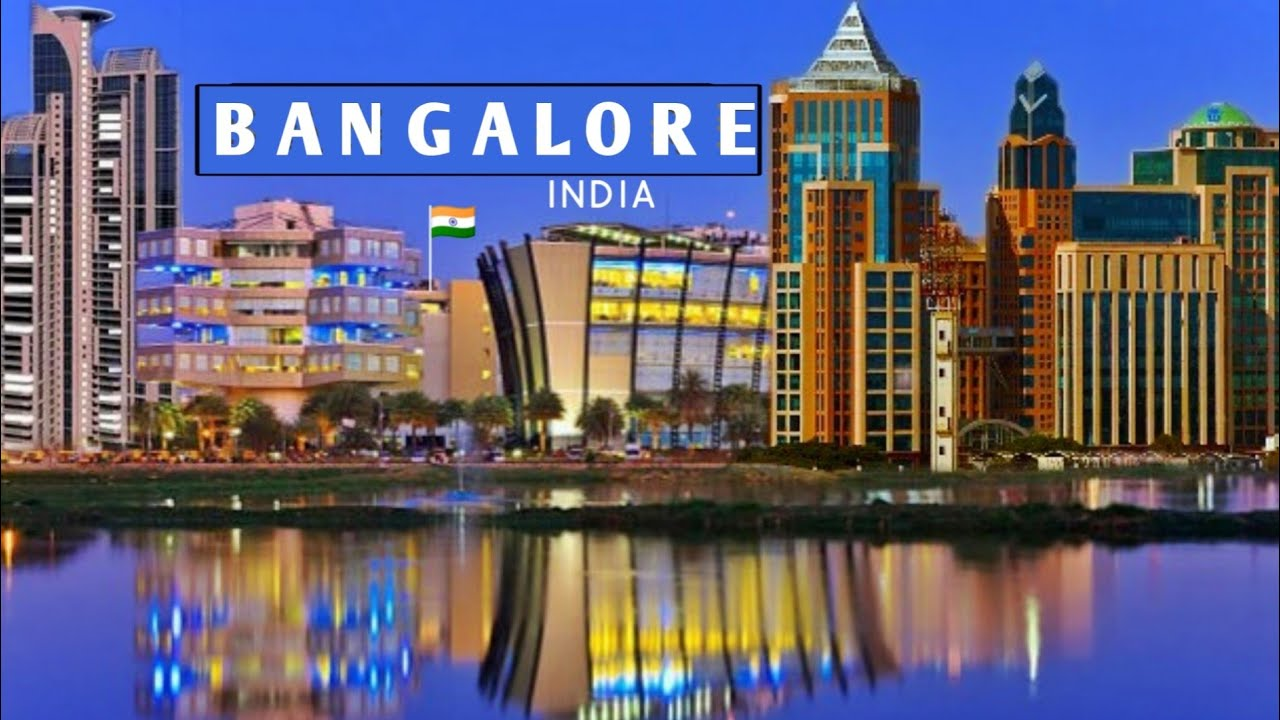

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv.xls')

## Data Exploration :

In [3]:
df.head(10)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
5  DuenaTa       1170   2.0      1.0   38.00  
6  Jaades        2732   4.0      NaN  204.00  
7  Brway G       3300   4.0      NaN  600.00  
8      NaN       1310   3.0      1.0   63.25  
9      NaN       1020   6.0      NaN  370.00

In [4]:
df.sample(10)

area_type   availability               location       size  \
8976   Super built-up  Area  Ready To Move          Kaggadasapura      2 BHK   
11315  Super built-up  Area  Ready To Move         Sarjapur  Road      2 BHK   
3780         Built-up  Area  Ready To Move           Thubarahalli      2 BHK   
8548         Built-up  Area  Ready To Move            Hennur Road      2 BHK   
6562             Plot  Area  Ready To Move            Dasarahalli  3 Bedroom   
593    Super built-up  Area         18-Jul            Venkatapura      1 BHK   
6115   Super built-up  Area  Ready To Move             Whitefield      2 BHK   
1847   Super built-up  Area  Ready To Move  4th Block Koramangala      2 BHK   
11909  Super built-up  Area         21-Dec         Kanakpura Road      3 BHK   
11716  Super built-up  Area  Ready To Move      Green Glen Layout      3 BHK   

       society total_sqft  bath  balcony  price  
8976   Chsilut       1180   2.0      2.0   70.0  
11315  Maantr        1323   2.0      2.0   74.0  
3780   Soowsa         975   2.0      1.0   55.0  
8548   Soncy R       1255   2.0      1.0   84.0  
6562       NaN       2400   2.0      1.0  152.0  
593        NaN        416   1.0      1.0   18.5  
6115   Veale R       1355   3.0      3.0   76.0  
1847   EvestPi       1225   2.0      2.0  150.0  
11909      NaN       1300   2.0      3.0   69.0  
11716  Sortz Q       1885   3.0      2.0  135.0

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.shape


(13320, 9)

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

In [10]:
df.describe().T

count        mean         std  min   25%   50%    75%     max
bath     13247.0    2.692610    1.341458  1.0   2.0   2.0    3.0    40.0
balcony  12711.0    1.584376    0.817263  0.0   1.0   2.0    2.0     3.0
price    13320.0  112.565627  148.971674  8.0  50.0  72.0  120.0  3600.0

## Data Cleaning and Preprocessing:

### The 'society' column has many null values, so we drop the column

In [11]:
df = df.drop(columns=['society'])

In [12]:
df.sample(10)

area_type   availability             location       size  \
7783   Super built-up  Area  Ready To Move  6th Block Jayanagar      3 BHK   
3594             Plot  Area  Ready To Move       Subramanyapura  6 Bedroom   
5541         Built-up  Area  Ready To Move       Nayandanahalli      3 BHK   
10595  Super built-up  Area  Ready To Move      Hanumanth Nagar      2 BHK   
9777   Super built-up  Area  Ready To Move       Dodda Nekkundi      2 BHK   
43               Plot  Area  Ready To Move            Yelahanka  1 Bedroom   
8034   Super built-up  Area         21-Dec       Talaghattapura      3 BHK   
11910            Plot  Area  Ready To Move             Kadugodi  3 Bedroom   
5815   Super built-up  Area  Ready To Move          Hennur Road      3 BHK   
8688             Plot  Area  Ready To Move         Basavanagara  3 Bedroom   

      total_sqft  bath  balcony   price  
7783        2100   4.0      2.0  255.00  
3594        1200   6.0      2.0  170.00  
5541        1350   2.0      3.0   68.00  
10595       1175   2.0      2.0   52.86  
9777        1315   2.0      2.0   50.00  
43           660   1.0      0.0   48.00  
8034        2273   3.0      3.0  159.00  
11910       1875   2.0      1.0  110.00  
5815        1685   3.0      2.0   95.00  
8688        1200   2.0      1.0  300.00

### Handling 'Size' column :

In [13]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df["size"].replace({"4 Bedroom": "4 BHK", 
                    "6 Bedroom": "6 BHK",
                   "3 Bedroom" : "3 BHK",
                   "1 Bedroom" : "1 BHK",
                   "1 RK" : "1 BHK",
                   '8 Bedroom' : '8 BHK',
                   '2 Bedroom': '2 BHK',
                   '7 Bedroom': '7 BHK',
                   '5 Bedroom' : '5 BHK',
                   '9 Bedroom': '9 BHK',
                   '10 Bedroom': '10 BHK',
                   '11 Bedroom': '11 BHK',
                   '43 Bedroom': '43 BHK',
                   '12 Bedroom': '12 BHK',
                   '18 Bedroom': '18 BHK'}, inplace=True)

In [15]:
df["size"].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '8 BHK', '7 BHK',
       '5 BHK', '11 BHK', '9 BHK', nan, '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'],
      dtype=object)

In [16]:
df["size"].isnull().sum()

16

In [17]:
df['size'].value_counts()

2 BHK     5528
3 BHK     4857
4 BHK     1417
1 BHK      656
5 BHK      356
6 BHK      221
7 BHK      100
8 BHK       89
9 BHK       54
10 BHK      14
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: size, dtype: int64

In [18]:
df['size'] = df['size'].fillna('2 BHK')

In [19]:
df["size"].isnull().sum()

0

### Handling 'bath' column :

In [20]:
df["bath"].isnull().sum()

73

In [21]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [22]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [23]:
df["bath"].isnull().sum()

0

<Axes: >

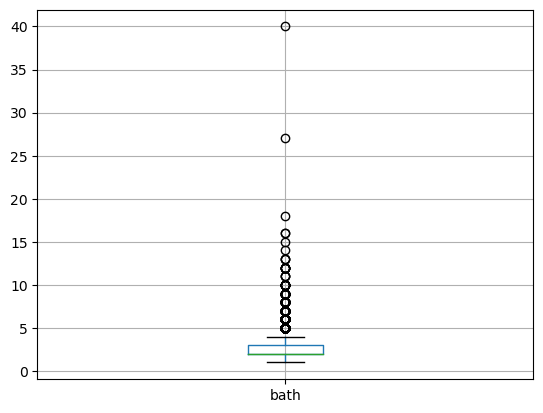

In [24]:
df.boxplot(column=['bath'])

In [25]:
def remove_outlier (col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [26]:
lowbath,upbath = remove_outlier(df['bath'])
df['bath']= np.where(df['bath']>upbath,upbath,df['bath'])
df['bath']= np.where(df['bath']<lowbath,lowbath,df['bath'])

In [27]:
df.boxplot(column=['bath'])

<Axes: >

### Handling 'balcony' column :

In [28]:
df["balcony"].isnull().sum()

609

In [29]:
df['balcony'] = df['balcony'].fillna(2)

In [30]:
df.boxplot(column=['balcony']) #NO OUTLIERS

<Axes: >

### Now converting the values(total_sqft) into float

In [31]:
df['total_sqft'].sample(10)

2906     1463
6026     1630
12215    1200
9117     1030
4640     1200
6658     1200
1164     1397
2223     1470
9411     1155
7403     1050
Name: total_sqft, dtype: object

### We can't simply convert the column in object to float because we can clearly see above (1255 - 1350) that some values are in range format, so it'll throw a 'ValueError'. Thus to encounter it we define a function which take avg of the two and stores them as float.

In [32]:
def convert_range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [33]:
df['total_sqft'] = df['total_sqft'].apply(convert_range)

In [34]:
df['total_sqft'].sample(10)

10619    1020.0
5958     1200.0
10736    1720.0
8933     3850.0
3979     1452.0
9900     1200.0
12458    1443.0
1817     1167.0
4956     1350.0
13018    1255.0
Name: total_sqft, dtype: float64

### So now we calculate the price/sq.feat = (total cost / total sq.feat)
## Note : price here is given in lakhs

In [35]:
df.boxplot(column=['price'])

<Axes: >

In [36]:
lowprice,upprice = remove_outlier(df['price'])
df['price']= np.where(df['price']>upprice,upprice,df['price'])
df['price']= np.where(df['price']<lowprice,lowprice,df['price'])

In [37]:
df.boxplot(column=['price'])

<Axes: >

In [38]:
df['price'].sample(4)

615     225.00
5227    140.00
1918     56.87
5195     75.00
Name: price, dtype: float64

In [39]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [40]:
df.sample(10)

area_type   availability                 location   size  \
8163   Super built-up  Area         18-Aug  Vasantha Vallabha Nagar  3 BHK   
1299             Plot  Area  Ready To Move               Chamrajpet  9 BHK   
13051  Super built-up  Area  Ready To Move            Kenchenahalli  3 BHK   
405              Plot  Area  Ready To Move            Kamakshipalya  2 BHK   
8507   Super built-up  Area  Ready To Move      1st Block Jayanagar  3 BHK   
11948  Super built-up  Area  Ready To Move             Marathahalli  3 BHK   
2847   Super built-up  Area         18-Dec               Whitefield  3 BHK   
10845  Super built-up  Area  Ready To Move    Raja Rajeshwari Nagar  3 BHK   
11741  Super built-up  Area  Ready To Move               R.T. Nagar  2 BHK   
9513         Built-up  Area  Ready To Move        Mahalakshmi Puram  6 BHK   

       total_sqft  bath  balcony  price  price_per_sqft  
8163       1280.0   2.0      1.0  100.0     7812.500000  
1299       4050.0   4.5      1.0  225.0     5555.555556  
13051      1720.0   3.0      2.0  100.0     5813.953488  
405        1000.0   2.0      0.0  165.0    16500.000000  
8507       1760.0   3.0      2.0  115.0     6534.090909  
11948      1800.0   3.0      2.0   95.0     5277.777778  
2847       2321.0   4.0      1.0  128.0     5514.864283  
10845      1260.0   2.0      1.0   62.0     4920.634921  
11741      1080.0   2.0      1.0   48.0     4444.444444  
9513       3000.0   4.5      3.0  225.0     7500.000000

### Now to group location based on the vacancy

In [41]:
df['location'].sample(40)

5777            Kodichikkanahalli
4812               A Narayanapura
13113           Somasundara Palya
8934                     Sarjapur
8836           6th Phase JP Nagar
5897                       Hebbal
9055             Doddakallasandra
11276                  Hosur Road
2678                Kengeri Hobli
6654           Singanayakanahalli
1137                   Whitefield
2183                Kaggadasapura
10676                  Whitefield
8530                     Budigere
3489           Mahalakshmi Layout
4664                   Anandapura
9277               CV Raman Nagar
6702           5th Phase JP Nagar
7911               CV Raman Nagar
5523          Sampangi Rama Nagar
117                   Thanisandra
11613                 Basavangudi
4371              Cunningham Road
5270       Kengeri Satellite Town
7772                       Hennur
10905                    KR Puram
59         Govindaraja Nagar Ward
7422        3rd Block Hrbr Layout
2003     Sri Venkateshpura Layout
3189        Ra

In [42]:
df['location'].value_counts()

Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

### To sort based on number of bedrooms

In [43]:
df.dtypes

area_type          object
availability       object
location           object
size               object
total_sqft        float64
bath              float64
balcony           float64
price             float64
price_per_sqft    float64
dtype: object

In [44]:
df['No_of_bedrooms'] = df['size'].str.split().str.get(0).astype(int)

In [45]:
df[df.No_of_bedrooms==3]

area_type   availability  \
2            Built-up  Area  Ready To Move   
3      Super built-up  Area  Ready To Move   
8      Super built-up  Area  Ready To Move   
10     Super built-up  Area         18-Feb   
14               Plot  Area  Ready To Move   
16     Super built-up  Area  Ready To Move   
17     Super built-up  Area  Ready To Move   
18     Super built-up  Area  Ready To Move   
21     Super built-up  Area         19-Dec   
23     Super built-up  Area  Ready To Move   
25     Super built-up  Area         18-May   
27           Built-up  Area         20-Dec   
29     Super built-up  Area  Ready To Move   
31     Super built-up  Area  Ready To Move   
32     Super built-up  Area  Ready To Move   
33     Super built-up  Area  Ready To Move   
34           Built-up  Area  Ready To Move   
37     Super built-up  Area  Ready To Move   
38     Super built-up  Area  Ready To Move   
41     Super built-up  Area         19-Dec   
51     Super built-up  Area         18-Mar   
52           Built-up  Area  Ready To Move   
54     Super built-up  Area  Ready To Move   
60               Plot  Area  Ready To Move   
70               Plot  Area  Ready To Move   
72     Super built-up  Area  Ready To Move   
74     Super built-up  Area  Ready To Move   
77           Built-up  Area  Ready To Move   
80     Super built-up  Area  Ready To Move   
83     Super built-up  Area  Ready To Move   
84     Super built-up  Area  Ready To Move   
86     Super built-up  Area  Ready To Move   
92     Super built-up  Area  Ready To Move   
95     Super built-up  Area  Ready To Move   
97     Super built-up  Area  Ready To Move   
99           Built-up  Area  Ready To Move   
100    Super built-up  Area  Ready To Move   
102              Plot  Area  Ready To Move   
106          Built-up  Area  Ready To Move   
107          Built-up  Area  Ready To Move   
110    Super built-up  Area  Ready To Move   
111    Super built-up  Area  Ready To Move   
113    Super built-up  Area  Ready To Move   
115          Built-up  Area  Ready To Move   
116    Super built-up  Area  Ready To Move   
117    Super built-up  Area         18-Dec   
120    Super built-up  Area  Ready To Move   
121    Super built-up  Area  Ready To Move   
124    Super built-up  Area         22-Dec   
126          Built-up  Area  Ready To Move   
130          Built-up  Area  Ready To Move   
131              Plot  Area  Ready To Move   
134    Super built-up  Area  Ready To Move   
138    Super built-up  Area         18-May   
139    Super built-up  Area         19-Jan   
142    Super built-up  Area  Ready To Move   
146    Super built-up  Area  Ready To Move   
148    Super built-up  Area  Ready To Move   
150    Super built-up  Area         19-Apr   
152    Super built-up  Area         18-May   
153    Super built-up  Area  Ready To Move   
157    Super built-up  Area  Ready To Move   
158    Super built-up  Area  Ready To Move   
160          Built-up  Area  Ready To Move   
162    Super built-up  Area  Ready To Move   
164    Super built-up  Area  Ready To Move   
166    Super built-up  Area  Ready To Move   
167    Super built-up  Area  Ready To Move   
169          Built-up  Area  Ready To Move   
173    Super built-up  Area  Ready To Move   
174    Super built-up  Area  Ready To Move   
175              Plot  Area  Ready To Move   
181    Super built-up  Area  Ready To Move   
182    Super built-up  Area  Ready To Move   
183    Super built-up  Area         21-Jun   
185              Plot  Area  Ready To Move   
191    Super built-up  Area  Ready To Move   
197          Built-up  Area  Ready To Move   
198    Super built-up  Area  Ready To Move   
201    Super built-up  Area  Ready To Move   
204          Built-up  Area  Ready To Move   
205    Super built-up  Area  Ready To Move   
206    Super built-up  Area  Ready To Move   
211    Super built-up  Area  Ready To Move   
212          Built-up  Area         18-Jun   
213    Super built-up  Area  Ready To Move   
214    Super bui

In [46]:
df['balcony'].isnull().sum()

0

### Handling Balcony values

## Data Visualzation :

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Sorting categorical and numerical data

In [48]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols 

Index(['area_type', 'availability', 'location', 'size'], dtype='object')

In [49]:
num_cols = df.select_dtypes(include = 'float64').columns
num_cols

Index(['total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft'], dtype='object')

### Univariate analysis

In [50]:
numeric_col=[feature for feature in df if df[feature].dtype!='O']
numeric_col

['total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft', 'No_of_bedrooms']

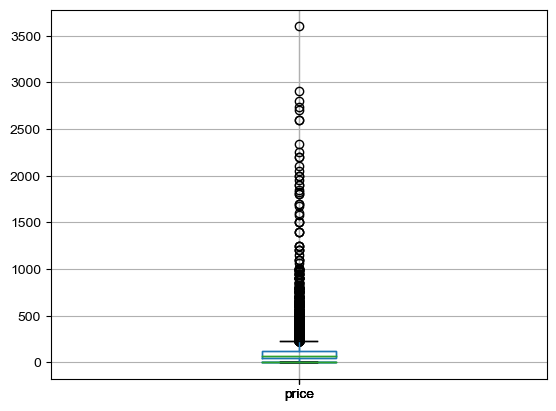

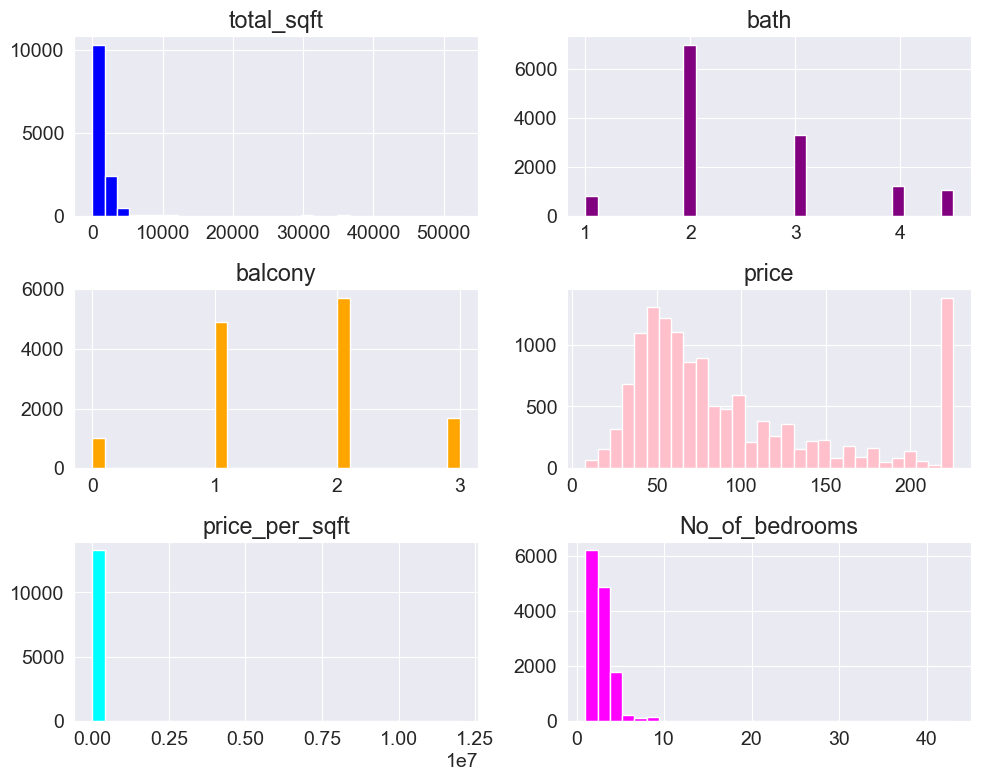

In [51]:

plt.figure(figsize=(10, 8))
color_palette = ['blue', 'purple', 'orange', 'pink', 'cyan', 'magenta']

for i, col in enumerate(numeric_col):
    plt.subplot(3, 2, i + 1)
    plt.hist(df[col], bins=30, color=color_palette[i])
    plt.title(col)

plt.tight_layout(pad=1.0)
plt.show()


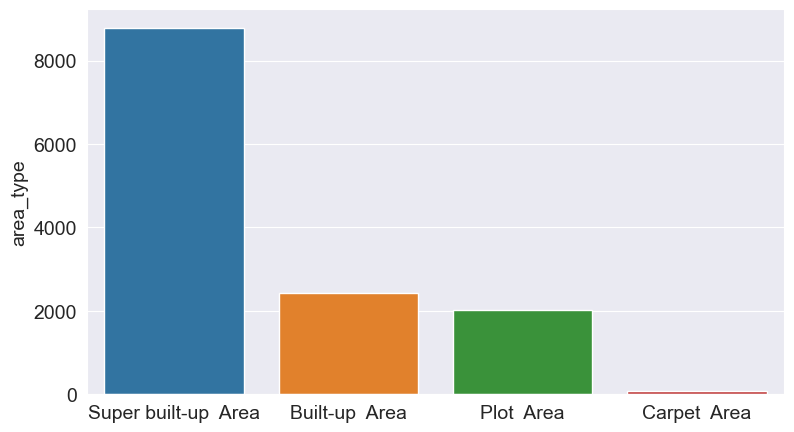

In [52]:
area_type_counts = df['area_type'].value_counts()

sns.barplot(x=area_type_counts.index, y=area_type_counts)
plt.show()

### The same above plot in pie with percentages.
### Visualizing Parts of a Whole,Showing Proportions

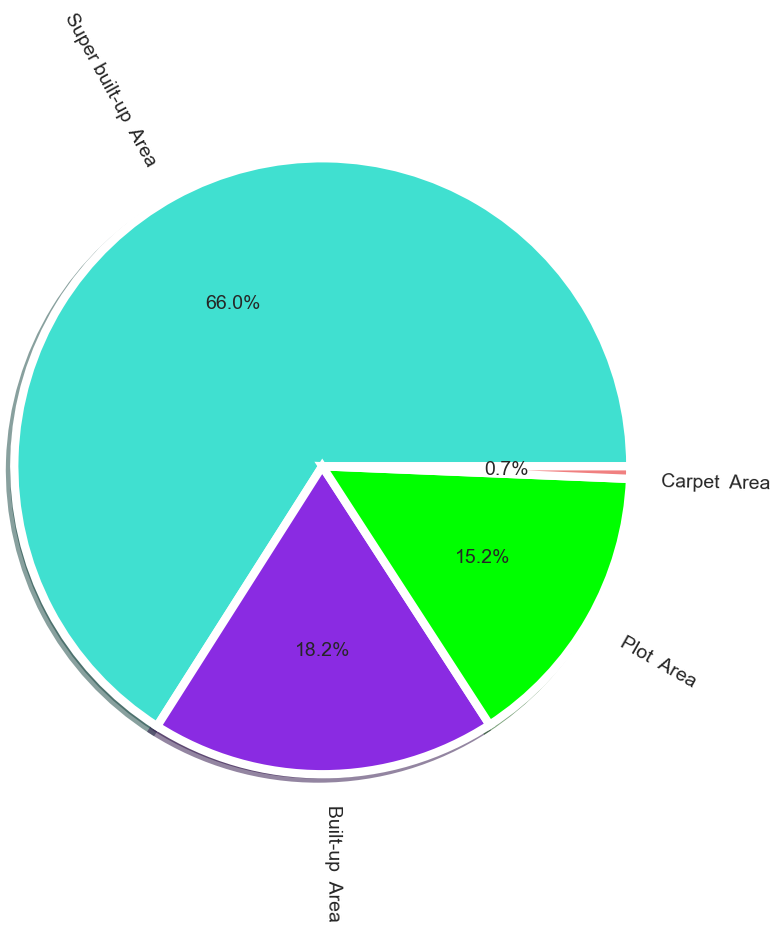

In [53]:
colors = ['turquoise', 'blueviolet', 'lime', 'lightcoral']
(df["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True, rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2, colors=colors)
plt.show()

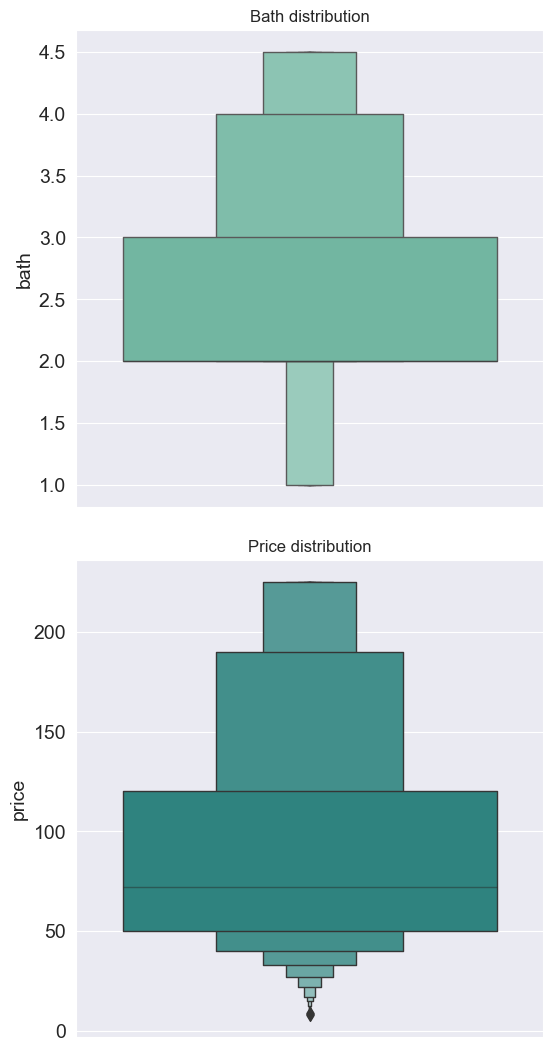

In [54]:
fig, axes = plt.subplots(2,1, figsize=(6,11))

sns.set_theme(style="darkgrid")
axes[0].set_title("Bath distribution")
axes[1].set_title("Price distribution")

sns.boxenplot(y=df.bath,palette='Set2', color='red',linewidth=1,ax=axes[0]);

sns.boxenplot(y=df.price,palette='viridis',linewidth=1,ax=axes[1])

plt.tight_layout(pad=2);

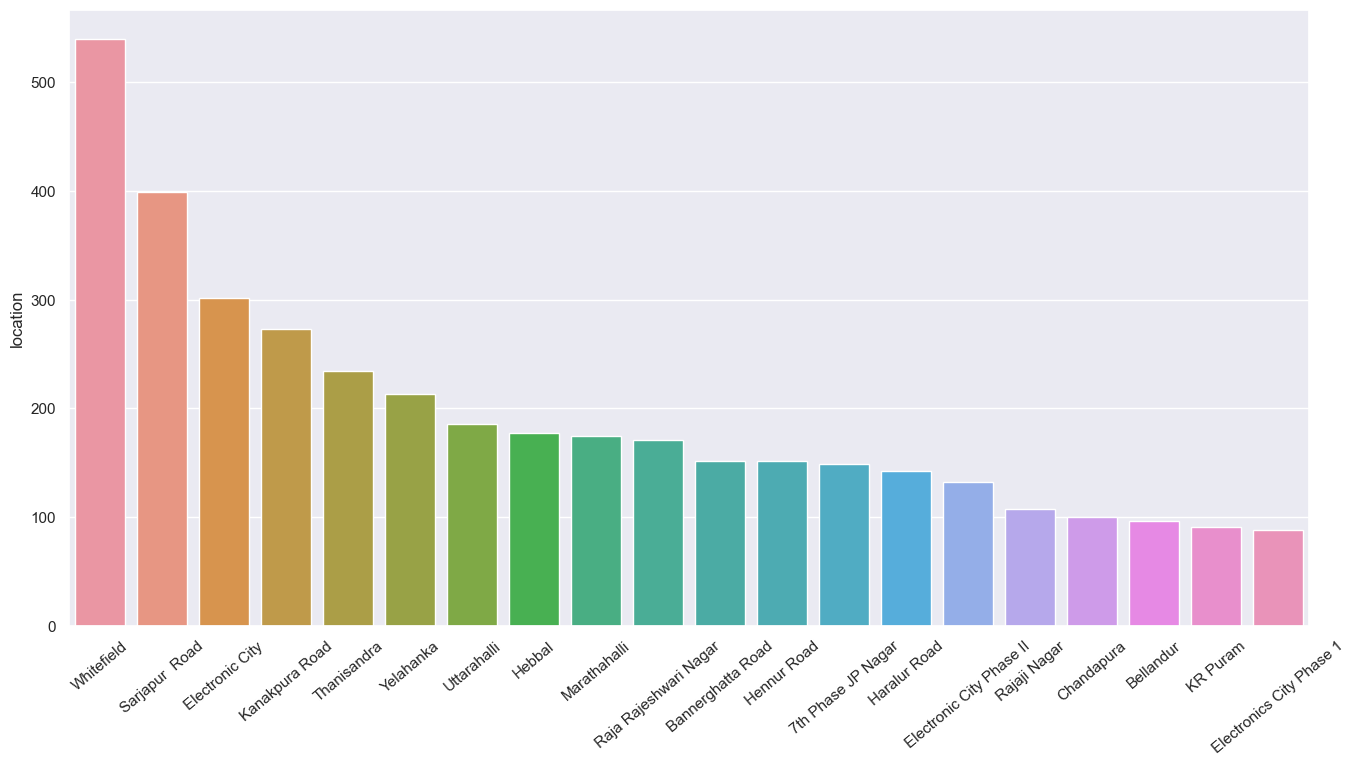

In [55]:
top_20_locations = df['location'].value_counts()[:20]
plt.figure(figsize=(16,8))
sns.barplot(x=top_20_locations.index, y=top_20_locations)
plt.xticks(rotation=40)
plt.show()

### Bivariate analysis

In [56]:
fig = px.histogram(df.sample(10000),
                   title='Bath vs Price',
                   x='bath',
                   y='price',
                   nbins=20,  
                   labels={'bath': 'Number of Bathrooms', 'price': 'Price'})

fig.update_layout(
    xaxis=dict(title=dict(text='Number of Bathrooms')), 
    yaxis=dict(title=dict(text='Price')), 
    bargap=0.1,  
    showlegend=False,  
)

fig.show()


In [57]:
fig = px.histogram(df.sample(10000),
                   title='Balcony vs Price',
                   x='balcony',
                   y='price',
                   nbins=10,  
                   opacity=0.7,  
                   color_discrete_sequence=['#FF7F0E'],  
                   template='plotly_white')  

fig.update_layout(
    xaxis_title='Number of Balconies',
    yaxis_title='Price',
    bargap=0.1,  
    showlegend=False  
)

fig.show()

In [58]:
fig = px.histogram(df.sample(10000),
                   title='Bath vs Balcony',
                   x='bath',
                   y='balcony',
                   color_discrete_sequence=['#1f77b4'],
                   opacity=0.7,
                   template='plotly_white',
                   nbins=20)

fig.update_layout(
    xaxis_title='Number of Bathrooms',
    yaxis_title='Number of Balcony',
    bargap=0.2,
    bargroupgap=0.1,
    showlegend=False
)

fig.show()


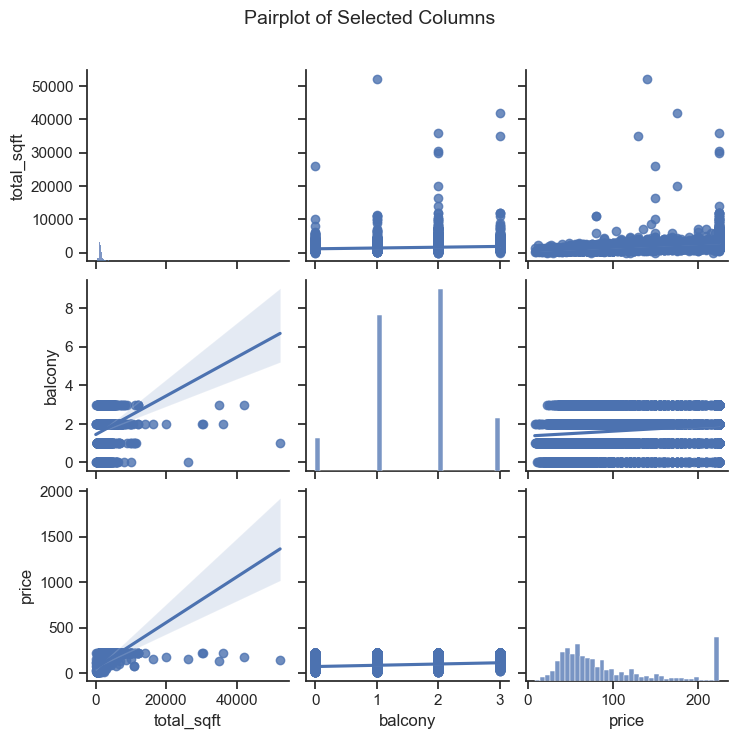

In [59]:

selected_columns = ['total_sqft', 'balcony','price' ]

df_selected = df[selected_columns]

sns.set(style="ticks")
color_palette = sns.color_palette("hls", n_colors=len(selected_columns))

sns.pairplot(df_selected, kind='reg', palette=color_palette)

plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot of Selected Columns", fontsize=14)

plt.show()


In [60]:
df['balcony'].sample(10)

3042     1.0
3782     2.0
2051     2.0
9426     2.0
6529     1.0
1701     2.0
4325     3.0
10191    1.0
7233     1.0
3425     2.0
Name: balcony, dtype: float64

### Now we gain insights of price for a particular laocation

In [61]:
data = df.copy()
data['BHK'] = data['size'].apply(lambda x: int(str(x).split(' ')[0]) if pd.notnull(x) else None)

In [62]:
data['BHK'].sample(5)

6974     3
5638     3
570      4
8508     3
12743    4
Name: BHK, dtype: int64

In [63]:
data['BHK'] = data['BHK'].fillna('2')

### Compare 3BHK & 2BHK in different locations

In [64]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

    
    plt.xticks(rotation=90) 

    plt.show()


### Here most of 3BHK houses around 220 lakhs

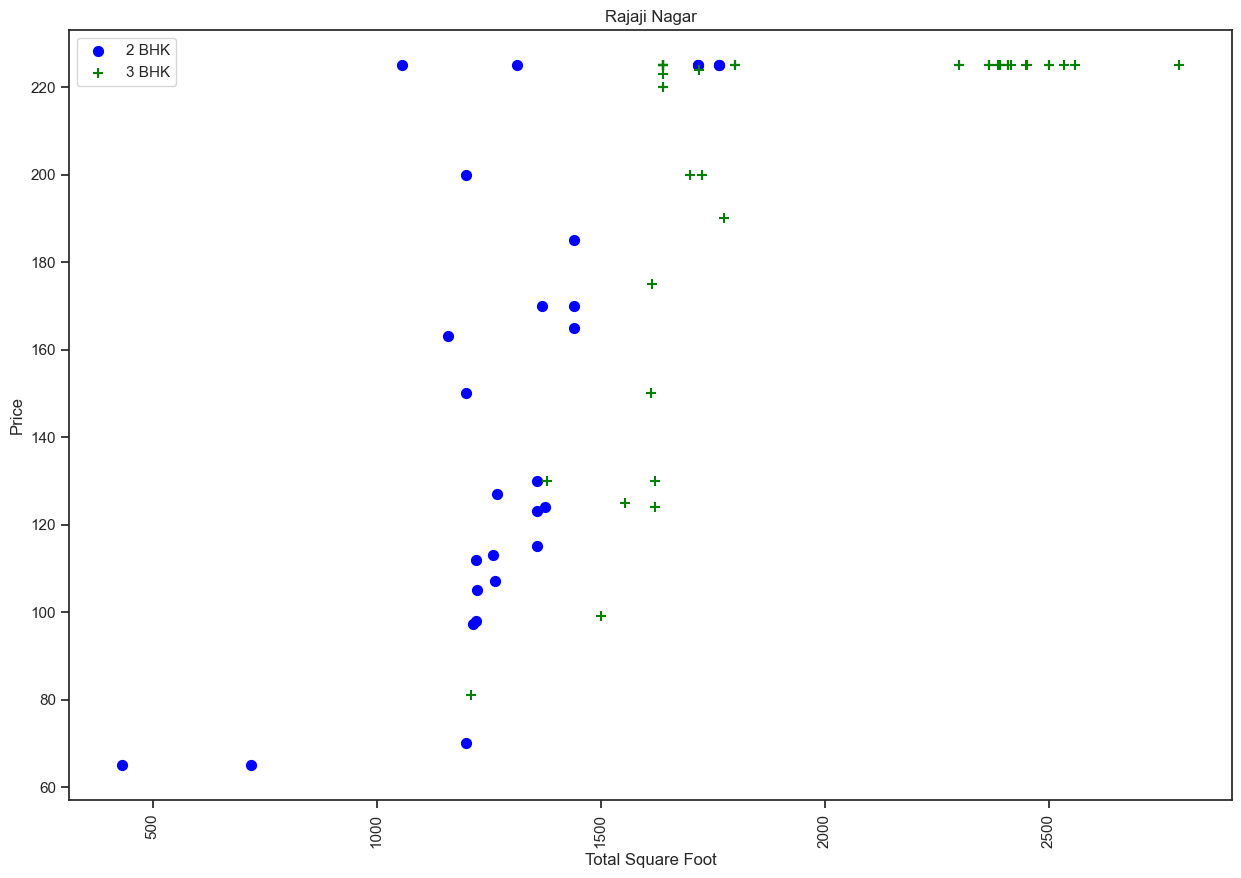

In [65]:
plot_scatter_chart(data,"Rajaji Nagar")

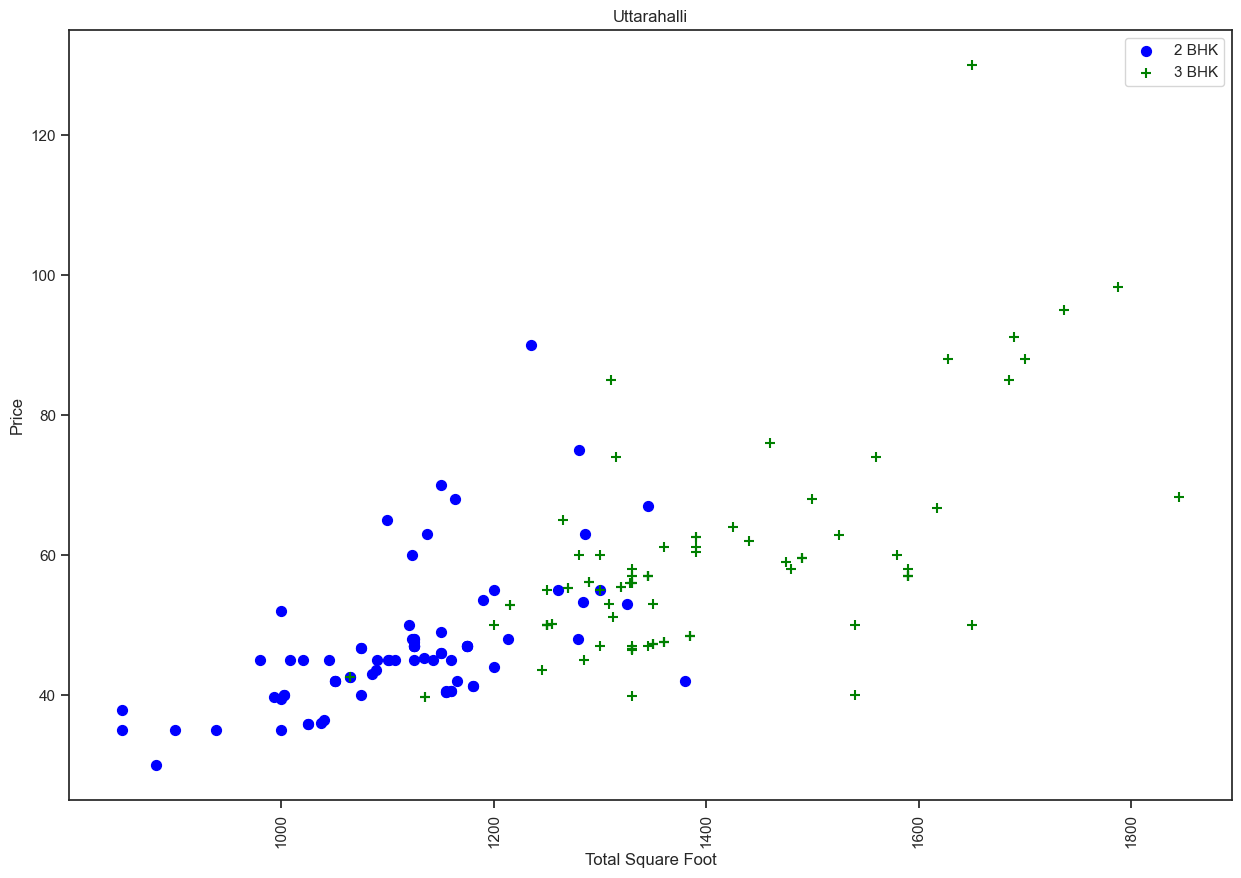

In [67]:
plot_scatter_chart(data,"Uttarahalli")

## So for any location price can be visualized as per the BHK

# Multivariate analysis

## PAIR PLOT

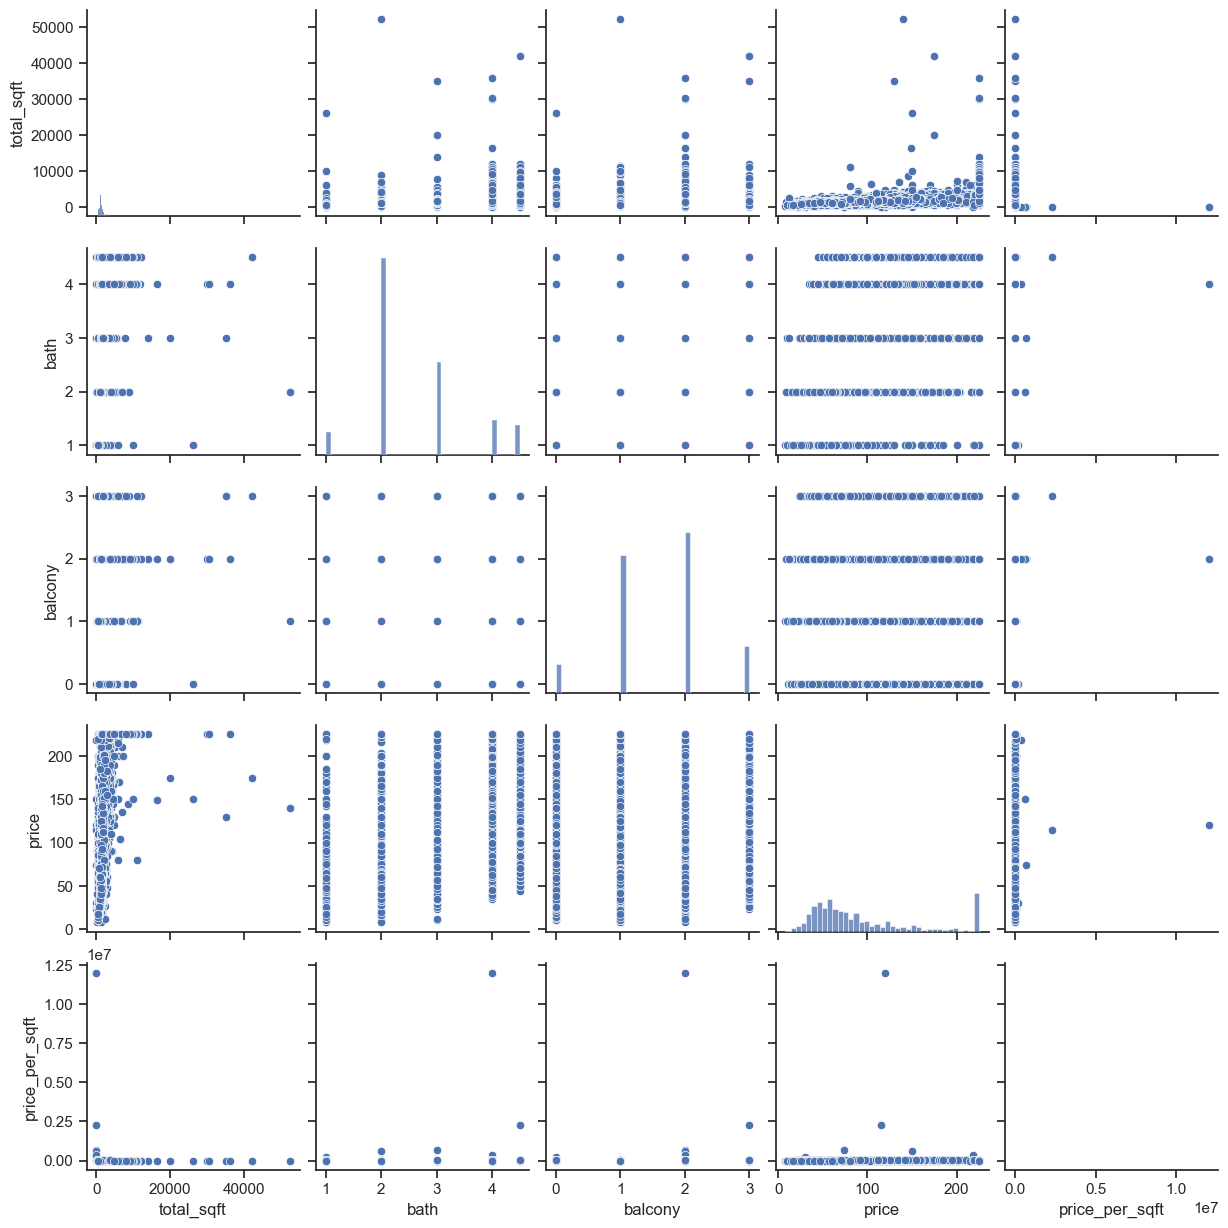

In [68]:
variables = ['total_sqft', 'bath', 'balcony', 'price', 'price_per_sqft']

sns.set(style="ticks")
sns.pairplot(data[variables])
plt.show()


## 3D SCATTER PLOT

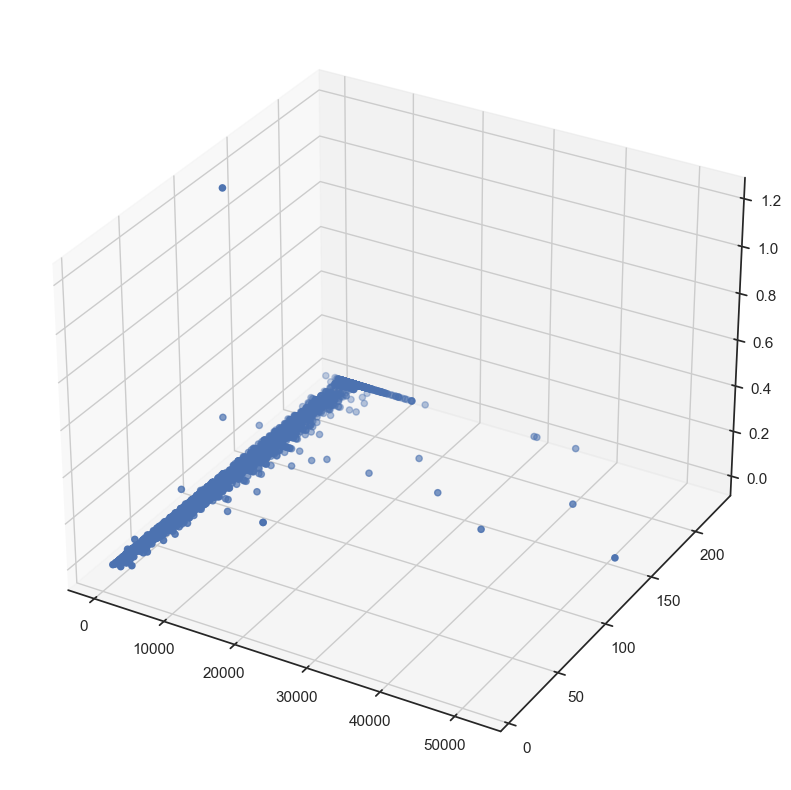

In [69]:
x = df['total_sqft']
y = df['price']
z = df['price_per_sqft']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()

### The correlation here is positive

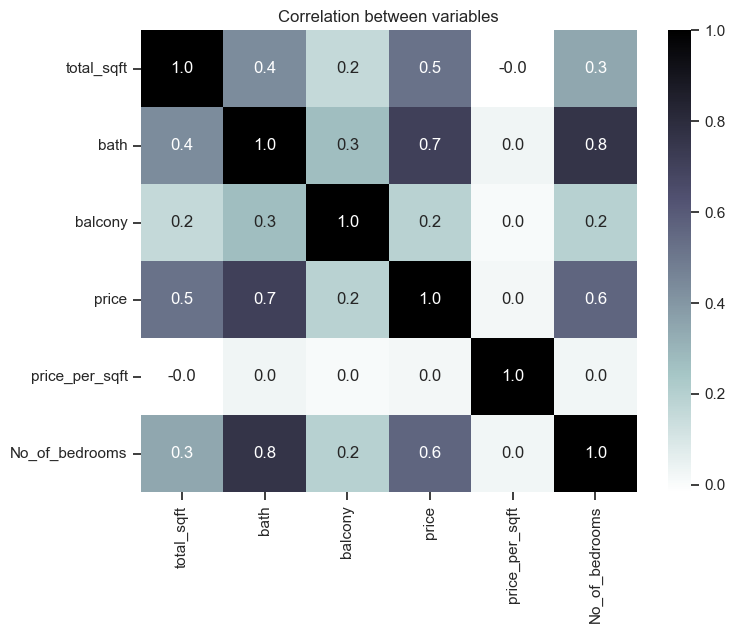

In [66]:
plt.figure(figsize = (8,6))
plt.title('Correlation between variables')
sns.heatmap(df.corr(), fmt='.1f', annot=True, cmap= "bone_r");